<a href="https://colab.research.google.com/github/rashmi-raviprasad/springboard/blob/master/faces_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
SAMPLE_DIRECTORY = '/content/drive/My Drive/Springboard DS Course/CAPSTONE 2/IMAGES/sample_dataset'
IMAGE_DIRECTORY = '/content/drive/My Drive/Springboard DS Course/CAPSTONE 2/IMAGES'

In [4]:
all_sample_imgs = []
y_train_sample = []
y_valid_sample = []
for folder in os.listdir(SAMPLE_DIRECTORY):
  for file in os.listdir(SAMPLE_DIRECTORY+'/'+folder):
    fn = SAMPLE_DIRECTORY + '/' + folder + '/' + file
    img = cv2.imread(fn)
    rgb_image =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    all_sample_imgs.append(rgb_image.astype(np.float32) / 255.)

len(all_sample_imgs)

50

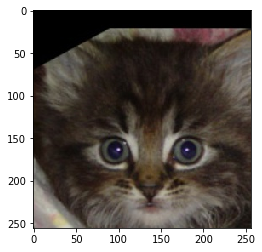

(256, 256, 3)


In [5]:
plt.imshow(all_sample_imgs[45])
plt.show()
print(all_sample_imgs[35].shape)

In [0]:
seed = 42
np.random.seed(seed)
np.random.shuffle(all_sample_imgs)
y_train_sample = all_sample_imgs[:40]
y_valid_sample = all_sample_imgs[40:]

In [0]:
x_train_sample = np.arange(len(y_train_sample))
x_valid_sample = np.arange(len(y_valid_sample))
x_all_sample = np.arange(len(all_sample_imgs))

In [8]:
x_train_sample, x_valid_sample, x_all_sample

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]))

In [9]:
np.asarray(y_train_sample).shape[0]

40

In [10]:
from keras.models import Sequential
from keras.layers import Activation, Input, Flatten, Reshape
from keras.layers.convolutional import Conv2DTranspose
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [11]:
BATCH_SIZE = 10
N_COMPONENTS = 100
INPUT_SHAPE = 256*256*3 # 256x256 image in 3 color channels
INPUT_DIMS = (50, INPUT_SHAPE)

decoder = Sequential()
decoder.add(Embedding(input_dim=50, output_dim=N_COMPONENTS, input_length=1))
decoder.add(Flatten(name='encoder'))
decoder.output_shape # (None, 100)

(None, 100)

In [12]:
decoder.add(Reshape((N_COMPONENTS, 1, 1)))
decoder.output_shape # (None, 100, 1, 1)

(None, 100, 1, 1)

In [13]:
decoder.add(Conv2DTranspose(filters=64, kernel_size=(4, 8), 
                            strides=(2, 2), activation='relu'))
decoder.output_shape

(None, 202, 8, 64)

In [14]:
decoder.add(Conv2DTranspose(filters=64, kernel_size=(4, 8), strides=(1, 2), activation='relu'))
decoder.output_shape

(None, 205, 22, 64)

In [15]:
decoder.add(Conv2DTranspose(filters=32, kernel_size=(5, 9), strides=(1, 2), activation='relu'))
decoder.output_shape

(None, 209, 51, 32)

In [16]:
decoder.add(Conv2DTranspose(filters=32, kernel_size=(8, 32), strides=(1, 2), activation='relu'))
decoder.output_shape

(None, 216, 132, 32)

In [17]:
decoder.add(Conv2DTranspose(filters=16, kernel_size=(8, 32), strides=1, activation='relu'))
decoder.output_shape

(None, 223, 163, 16)

In [18]:
decoder.add(Conv2DTranspose(filters=16, kernel_size=(8, 32), strides=1, activation='sigmoid'))
decoder.output_shape

(None, 230, 194, 16)

In [19]:
decoder.add(Conv2DTranspose(filters=8, kernel_size=(12, 32), strides=1, activation='relu'))
decoder.output_shape 

(None, 241, 225, 8)

In [20]:
decoder.add(Conv2DTranspose(filters=3, kernel_size=(16, 32), strides=1, activation='relu'))
decoder.output_shape

(None, 256, 256, 3)

In [21]:
decoder.compile(optimizer='adam', loss='mse')

In [22]:
N_EPOCHS = 5
x = np.array(x_all_sample)
y = np.array(all_sample_imgs)
history = decoder.fit(x, y, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_split=0.2)




Train on 40 samples, validate on 10 samples
Epoch 1/5





40/40 [==============================] - 154s 4s/step - loss: 2.4242 - val_loss: 0.2678
Epoch 2/5
40/40 [==============================] - 149s 4s/step - loss: 0.3057 - val_loss: 0.2665
Epoch 3/5
40/40 [==============================] - 148s 4s/step - loss: 0.3038 - val_loss: 0.2643
Epoch 4/5
40/40 [==============================] - 147s 4s/step - loss: 0.2967 - val_loss: 0.2448
Epoch 5/5
40/40 [==============================] - 147s 4s/step - loss: 0.2680 - val_loss: 0.2185


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


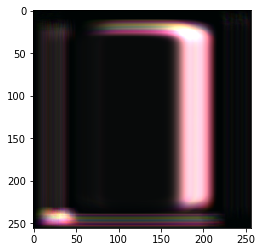

In [24]:
compressed = decoder.predict(x, batch_size=BATCH_SIZE)
plt.imshow(compressed[0])